# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

Extração/Obtenção de Dados

In [2]:
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


Análise exploratório

,Preco
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


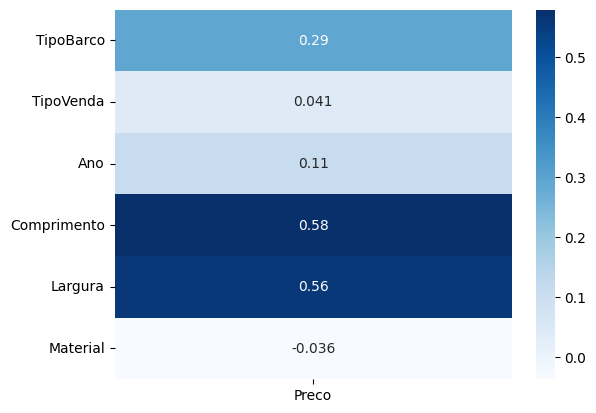

In [16]:
# correlação dos valores da tabela
correlacao = tabela.corr()[["Preco"]].drop("Preco", axis=0)
display(correlacao)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlacao, cmap="Blues", annot=True)

plt.show()

Preparação IA

In [63]:
#separando dados em X e Y
y = tabela["Preco"]
x = tabela.drop("Preco", axis=1)

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

Criação e Treino da IA

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# criar a inteligencia artifical
modelo_regressaoliner = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar a inteligencia artifical
modelo_regressaoliner.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [65]:
previsao_regressaolinear = modelo_regressaoliner.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.40582087680830137
0.8026768942472187


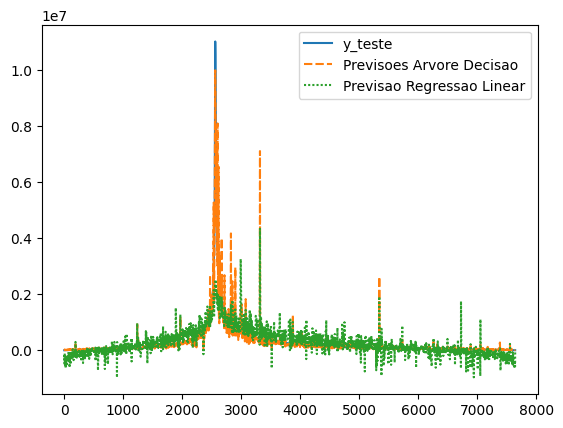

In [66]:
tabela_previsao = pd.DataFrame()
tabela_previsao['y_teste'] = y_teste
tabela_previsao["Previsoes Arvore Decisao"] = previsao_arvoredecisao
tabela_previsao["Previsao Regressao Linear"] = previsao_regressaolinear
sns.lineplot(data=tabela_previsao)
plt.show()

In [73]:
tabela_nova = pd.read_csv("novos_barcos.csv")
previsao = modelo_arvoredecisao.predict(tabela_nova)
previsao = [round(x, 2) for x in previsao]
print(previsao)
tabela_nova["Previsao"] = previsao
display(tabela_nova)

[6605.7, 9153.03, 19468.6]


,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material,Previsao
0,2,3,2023,3.0,1.5,1,6605.70
1,2,1,2023,3.8,1.9,2,9153.03
2,3,2,1999,6.2,3.0,2,19468.60
